In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

fake = Faker("en_GB")


In [2]:
companies = pd.DataFrame({
    "Company": ["Waterstones", "WHSmith"],
    "Store_Count_England": [280, 320],
    "Avg_Books_Sold_Per_Store_Per_Week": [850, 600],
    "Post_Apocalyptic_Percentage": [0.12, 0.08],
    "Avg_Book_Price": [12.99, 10.99],
    "Profit_Margin": [0.35, 0.28]
})

companies


,Company,Store_Count_England,Avg_Books_Sold_Per_Store_Per_Week,Post_Apocalyptic_Percentage,Avg_Book_Price,Profit_Margin
0,Waterstones,280,850,0.12,12.99,0.35
1,WHSmith,320,600,0.08,10.99,0.28


In [3]:
books = pd.DataFrame({
    "Book_Title": [
        "Ashes of London",
        "After the Collapse",
        "Silent Earth UK",
        "Last Train to Manchester",
        "The Final Crown",
        "Dead Albion",
        "Northern Wasteland",
        "Empire of Dust",
        "Survivors of Thames",
        "Britain After Fire"
    ],
    "Genre": ["Post-Apocalyptic"]*10,
    "Avg_Sales_Per_Week": np.random.randint(500, 3000, 10),
    "Price": np.random.uniform(8.99, 14.99, 10)
})

books


,Book_Title,Genre,Avg_Sales_Per_Week,Price
0,Ashes of London,Post-Apocalyptic,942,13.905342
1,After the Collapse,Post-Apocalyptic,622,14.888908
2,Silent Earth UK,Post-Apocalyptic,2313,10.891375
3,Last Train to Manchester,Post-Apocalyptic,1488,13.124573
4,The Final Crown,Post-Apocalyptic,736,14.282514
5,Dead Albion,Post-Apocalyptic,1151,11.908065
6,Northern Wasteland,Post-Apocalyptic,1518,11.306740
7,Empire of Dust,Post-Apocalyptic,734,12.389267
8,Survivors of Thames,Post-Apocalyptic,876,13.423925
9,Britain After Fire,Post-Apocalyptic,583,11.727383


In [4]:
demographics = pd.DataFrame({
    "Age_Group": ["13-17", "18-24", "25-34", "35-44", "45-54", "55+"],
    "Percent_Buying_Post_Apocalyptic": [0.08, 0.32, 0.28, 0.18, 0.09, 0.05],
    "Primary_Store": [
        "WHSmith",
        "Waterstones",
        "Waterstones",
        "Waterstones",
        "WHSmith",
        "WHSmith"
    ]
})

demographics


,Age_Group,Percent_Buying_Post_Apocalyptic,Primary_Store
0,13-17,0.08,WHSmith
1,18-24,0.32,Waterstones
2,25-34,0.28,Waterstones
3,35-44,0.18,Waterstones
4,45-54,0.09,WHSmith
5,55+,0.05,WHSmith


In [5]:
stores = []

for company in companies["Company"]:
    store_count = companies.loc[companies["Company"] == company, "Store_Count_England"].values[0]
    
    for i in range(store_count):
        weekly_sales = np.random.randint(500, 1200)
        stores.append({
            "Store_ID": fake.uuid4(),
            "Company": company,
            "City": fake.city(),
            "Weekly_Total_Book_Sales": weekly_sales
        })

stores_df = pd.DataFrame(stores)

stores_df.head()


,Store_ID,Company,City,Weekly_Total_Book_Sales
0,236d7d00-11dd-4e99-bbfe-8bec50feb35d,Waterstones,Haynesville,530
1,ce67b50d-0327-4243-984f-6464d8e9ee5f,Waterstones,Dawsonton,952
2,16512b34-8dc3-40c9-a895-93e1f1eae01e,Waterstones,Sharonmouth,1135
3,3ad89379-eb0c-4b89-a445-df084b3c5a99,Waterstones,Port Sally,861
4,018a5b58-d7c4-4440-b66f-0428c175c8bd,Waterstones,North Stephanie,591


In [6]:
def calculate_post_apocalyptic_sales(row):
    percentage = companies.loc[
        companies["Company"] == row["Company"],
        "Post_Apocalyptic_Percentage"
    ].values[0]
    
    return row["Weekly_Total_Book_Sales"] * percentage

stores_df["Post_Apocalyptic_Weekly_Sales"] = stores_df.apply(
    calculate_post_apocalyptic_sales, axis=1
)

stores_df.head()


,Store_ID,Company,City,Weekly_Total_Book_Sales,Post_Apocalyptic_Weekly_Sales
0,236d7d00-11dd-4e99-bbfe-8bec50feb35d,Waterstones,Haynesville,530,63.60
1,ce67b50d-0327-4243-984f-6464d8e9ee5f,Waterstones,Dawsonton,952,114.24
2,16512b34-8dc3-40c9-a895-93e1f1eae01e,Waterstones,Sharonmouth,1135,136.20
3,3ad89379-eb0c-4b89-a445-df084b3c5a99,Waterstones,Port Sally,861,103.32
4,018a5b58-d7c4-4440-b66f-0428c175c8bd,Waterstones,North Stephanie,591,70.92


In [7]:
def calculate_revenue(row):
    price = companies.loc[
        companies["Company"] == row["Company"],
        "Avg_Book_Price"
    ].values[0]
    
    return row["Post_Apocalyptic_Weekly_Sales"] * price

stores_df["Weekly_Revenue"] = stores_df.apply(
    calculate_revenue, axis=1
)

stores_df.head()


,Store_ID,Company,City,Weekly_Total_Book_Sales,Post_Apocalyptic_Weekly_Sales,Weekly_Revenue
0,236d7d00-11dd-4e99-bbfe-8bec50feb35d,Waterstones,Haynesville,530,63.60,826.1640
1,ce67b50d-0327-4243-984f-6464d8e9ee5f,Waterstones,Dawsonton,952,114.24,1483.9776
2,16512b34-8dc3-40c9-a895-93e1f1eae01e,Waterstones,Sharonmouth,1135,136.20,1769.2380
3,3ad89379-eb0c-4b89-a445-df084b3c5a99,Waterstones,Port Sally,861,103.32,1342.1268
4,018a5b58-d7c4-4440-b66f-0428c175c8bd,Waterstones,North Stephanie,591,70.92,921.2508


In [8]:
def calculate_profit(row):
    margin = companies.loc[
        companies["Company"] == row["Company"],
        "Profit_Margin"
    ].values[0]
    
    return row["Weekly_Revenue"] * margin

stores_df["Weekly_Profit"] = stores_df.apply(
    calculate_profit, axis=1
)

stores_df.head()


,Store_ID,Company,City,Weekly_Total_Book_Sales,Post_Apocalyptic_Weekly_Sales,Weekly_Revenue,Weekly_Profit
0,236d7d00-11dd-4e99-bbfe-8bec50feb35d,Waterstones,Haynesville,530,63.60,826.1640,289.15740
1,ce67b50d-0327-4243-984f-6464d8e9ee5f,Waterstones,Dawsonton,952,114.24,1483.9776,519.39216
2,16512b34-8dc3-40c9-a895-93e1f1eae01e,Waterstones,Sharonmouth,1135,136.20,1769.2380,619.23330
3,3ad89379-eb0c-4b89-a445-df084b3c5a99,Waterstones,Port Sally,861,103.32,1342.1268,469.74438
4,018a5b58-d7c4-4440-b66f-0428c175c8bd,Waterstones,North Stephanie,591,70.92,921.2508,322.43778


In [9]:
profit_summary = stores_df.groupby("Company").agg({
    "Weekly_Revenue": "sum",
    "Weekly_Profit": "sum"
})

profit_summary["Yearly_Revenue"] = profit_summary["Weekly_Revenue"] * 52
profit_summary["Yearly_Profit"] = profit_summary["Weekly_Profit"] * 52

profit_summary


,Weekly_Revenue,Weekly_Profit,Yearly_Revenue,Yearly_Profit
Company,,,,
WHSmith,235425.1424,65919.039872,1.224211e+07,3.427790e+06
Waterstones,364120.0920,127442.032200,1.893424e+07,6.626986e+06


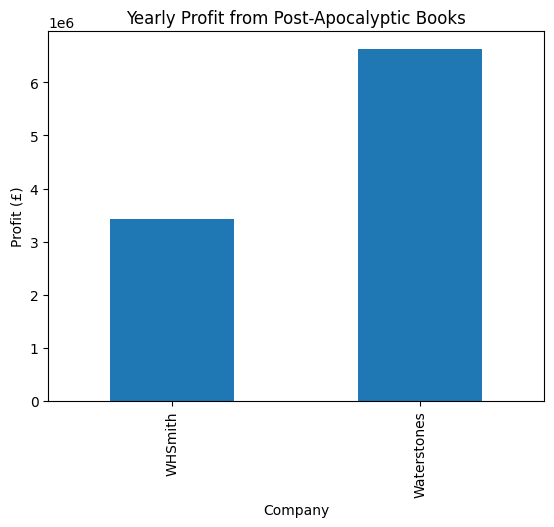

In [10]:
profit_summary["Yearly_Profit"].plot(kind="bar")

plt.title("Yearly Profit from Post-Apocalyptic Books")
plt.ylabel("Profit (£)")
plt.xlabel("Company")
plt.show()


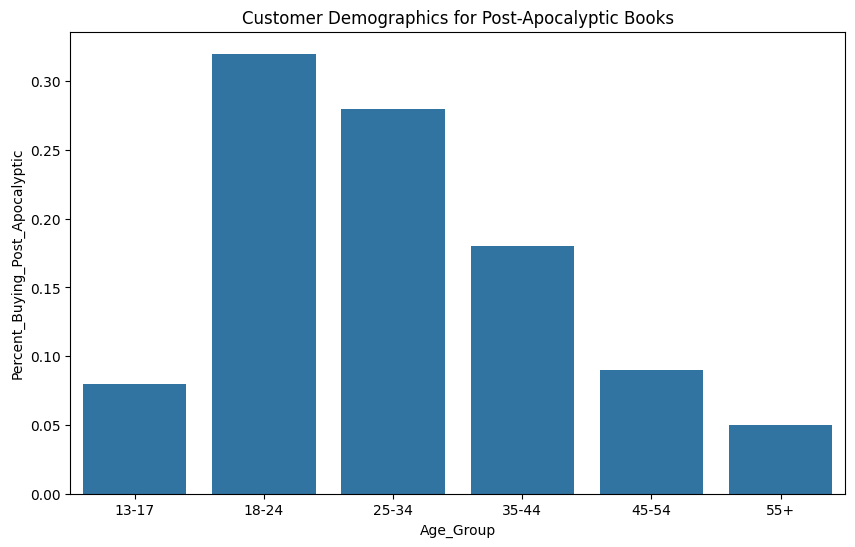

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Age_Group",
    y="Percent_Buying_Post_Apocalyptic",
    data=demographics
)

plt.title("Customer Demographics for Post-Apocalyptic Books")
plt.show()


In [12]:
company_logic = pd.DataFrame({
    "Company": ["Waterstones", "WHSmith"],
    "Customer_Type": [
        "Dedicated readers, students, collectors",
        "Casual readers, commuters, airport customers"
    ],
    "Location_Type": [
        "City centres, malls",
        "Airports, train stations, high streets"
    ],
    "Marketing_Strategy": [
        "Genre promotion, book clubs",
        "Impulse buying, convenience"
    ],
    "Avg_Profit_Per_Customer": [4.50, 2.80]
})

company_logic


,Company,Customer_Type,Location_Type,Marketing_Strategy,Avg_Profit_Per_Customer
0,Waterstones,"Dedicated readers, students, collectors","City centres, malls","Genre promotion, book clubs",4.5
1,WHSmith,"Casual readers, commuters, airport customers","Airports, train stations, high streets","Impulse buying, convenience",2.8


In [13]:
stores_df.to_csv("england_post_apocalyptic_book_sales.csv", index=False)
companies.to_csv("company_data.csv", index=False)
demographics.to_csv("customer_demographics.csv", index=False)
